SHAPE:  ()
ndoe 3
Minimum in x=18.9 with f(x)=-15.1


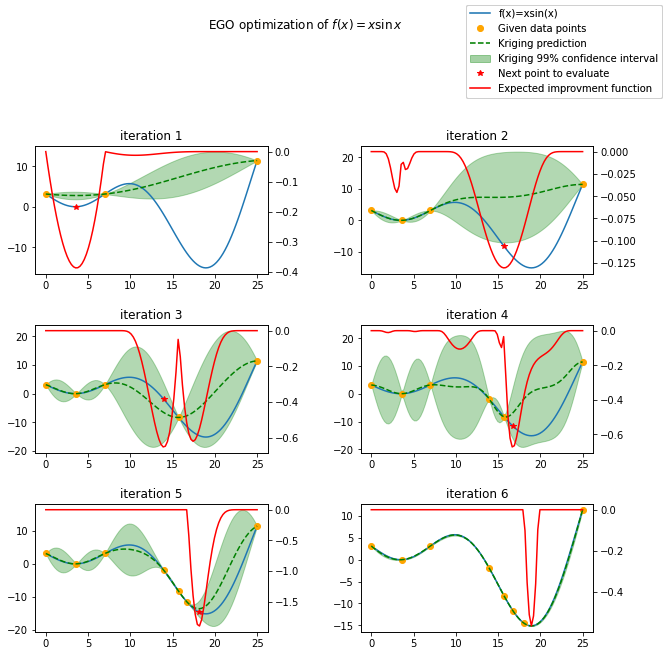

In [11]:
import numpy as np
from smt.applications import EGO
import matplotlib.pyplot as plt

def function_test_1d(x):
    # function xsinx
    #import numpy as np

    #x = np.reshape(x, (-1,))
    #y = np.zeros(x.shape)
    y = (x - 3.5) * np.sin((x - 3.5) / (np.pi))
    return y

data = function_test_1d(3)
print("SHAPE: ", data.shape)

n_iter = 6
xlimits = np.array([[0.0, 25.0]])
xdoe = np.atleast_2d([0.0, 7.0, 25.0]).T
n_doe = xdoe.size
print("ndoe", n_doe)

criterion = "EI"  #'EI' or 'SBO' or 'LCB'

ego = EGO(n_iter=n_iter, criterion=criterion, xdoe=xdoe, xlimits=xlimits)

x_opt, y_opt, _, x_data, y_data = ego.optimize(fun=function_test_1d)
print("Minimum in x={:.1f} with f(x)={:.1f}".format(float(x_opt), float(y_opt)))

x_plot = np.atleast_2d(np.linspace(0, 25, 100)).T
y_plot = function_test_1d(x_plot)

fig = plt.figure(figsize=[10, 10])
for i in range(n_iter):
    k = n_doe + i
    x_data_k = x_data[0:k]
    y_data_k = y_data[0:k]
    ego.gpr.set_training_values(x_data_k, y_data_k)
    ego.gpr.train()

    y_gp_plot = ego.gpr.predict_values(x_plot)
    y_gp_plot_var = ego.gpr.predict_variances(x_plot)
    y_ei_plot = -ego.EI(x_plot)

    ax = fig.add_subplot((n_iter + 1) // 2, 2, i + 1)
    ax1 = ax.twinx()
    (ei,) = ax1.plot(x_plot, y_ei_plot, color="red")

    (true_fun,) = ax.plot(x_plot, y_plot)
    (data,) = ax.plot(
        x_data_k, y_data_k, linestyle="", marker="o", color="orange"
    )
    if i < n_iter - 1:
        (opt,) = ax.plot(
            x_data[k], y_data[k], linestyle="", marker="*", color="r"
        )
    (gp,) = ax.plot(x_plot, y_gp_plot, linestyle="--", color="g")
    sig_plus = y_gp_plot + 3 * np.sqrt(y_gp_plot_var)
    sig_moins = y_gp_plot - 3 * np.sqrt(y_gp_plot_var)
    un_gp = ax.fill_between(
        x_plot.T[0], sig_plus.T[0], sig_moins.T[0], alpha=0.3, color="g"
    )
    lines = [true_fun, data, gp, un_gp, opt, ei]
    fig.suptitle("EGO optimization of $f(x) = x \sin{x}$")
    fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.8)
    ax.set_title("iteration {}".format(i + 1))
    fig.legend(
        lines,
        [
            "f(x)=xsin(x)",
            "Given data points",
            "Kriging prediction",
            "Kriging 99% confidence interval",
            "Next point to evaluate",
            "Expected improvment function",
        ],
    )
plt.show()

In [19]:
import numpy as np
from smt.applications import EGO
from smt.applications.mixed_integer import (
    MixedIntegerContext,
    FLOAT,
    ENUM,
    ORD,
)
import matplotlib.pyplot as plt
from smt.surrogate_models import KRG
from smt.sampling_methods import LHS

# Regarding the interface, the function to be optimized should handle
# categorical values as index values in the enumeration type specification.
# For instance, here "blue" will be passed to the function as the index value 2.
# This allows to keep the numpy ndarray X handling numerical values.
def function_test_mixed_integer(X):
    print("Shape ", X.shape)
    # float
    x1 = X[:, 0]
    #  enum 1
    x2 = X[:, 1]
    y = x1 * x2 - np.cos(x1)
    return y

n_iter = 15
xtypes = [FLOAT, FLOAT]
xlimits = np.array(
    [[-5, 5] , [0, 2]]
)
criterion = "EI"  #'EI' or 'SBO' or 'LCB'
qEI = "KB"
sm = KRG(print_global=False)
# mixint = MixedIntegerContext(xtypes, xlimits)
# n_doe = 3
# sampling = mixint.build_sampling_method(LHS, criterion="ese", random_state=42)
# xdoe = sampling(n_doe)

n_doe = 3
sampling = LHS(xlimits=xlimits)
xdoe = sampling(n_doe)

ydoe = function_test_mixed_integer(xdoe)

print("SHAPE YDOE", ydoe.shape)

ego = EGO(
    n_iter=n_iter,
    criterion=criterion,
    xdoe=xdoe,
    ydoe=ydoe,
    xtypes=xtypes,
    xlimits=xlimits,
    surrogate=sm,
    qEI=qEI,
    random_state=42,
)

x_opt, y_opt, _, _, y_data = ego.optimize(fun=function_test_mixed_integer)

Shape  (3, 2)
SHAPE YDOE (3,)
Shape  (1, 2)
Shape  (1, 2)
Shape  (1, 2)
Shape  (1, 2)
Shape  (1, 2)
Shape  (1, 2)
Shape  (1, 2)
Shape  (1, 2)
Shape  (1, 2)
Shape  (1, 2)


/home/hellebor/my_utox/anaconda3/lib/python3.8/site-packages/smt/surrogate_models/krg_based.py:211: UserWarning: Warning: multiple x input features have the same value (at least same row twice).
  warnings.warn("Warning: multiple x input features have the same value (at least same row twice).")


Shape  (1, 2)


/home/hellebor/my_utox/anaconda3/lib/python3.8/site-packages/smt/surrogate_models/krg_based.py:211: UserWarning: Warning: multiple x input features have the same value (at least same row twice).
  warnings.warn("Warning: multiple x input features have the same value (at least same row twice).")


Shape  (1, 2)


/home/hellebor/my_utox/anaconda3/lib/python3.8/site-packages/smt/surrogate_models/krg_based.py:211: UserWarning: Warning: multiple x input features have the same value (at least same row twice).
  warnings.warn("Warning: multiple x input features have the same value (at least same row twice).")


Shape  (1, 2)


/home/hellebor/my_utox/anaconda3/lib/python3.8/site-packages/smt/surrogate_models/krg_based.py:211: UserWarning: Warning: multiple x input features have the same value (at least same row twice).
  warnings.warn("Warning: multiple x input features have the same value (at least same row twice).")


Shape  (1, 2)


/home/hellebor/my_utox/anaconda3/lib/python3.8/site-packages/smt/surrogate_models/krg_based.py:211: UserWarning: Warning: multiple x input features have the same value (at least same row twice).
  warnings.warn("Warning: multiple x input features have the same value (at least same row twice).")


Shape  (1, 2)


In [ ]:
print("Minimum in x={} with f(x)={:.1f}".format(x_opt, float(y_opt)))
print("Minimum in typed x={}".format(ego.mixint.cast_to_mixed_integer(x_opt)))

min_ref = -15
mini = np.zeros(n_iter)
for k in range(n_iter):
    mini[k] = np.log(np.abs(np.min(y_data[0 : k + n_doe - 1]) - min_ref))
x_plot = np.linspace(1, n_iter + 0.5, n_iter)
u = max(np.floor(max(mini)) + 1, -100)
l = max(np.floor(min(mini)) - 0.2, -10)
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(x_plot, mini, color="r")
axes.set_ylim([l, u])
plt.title("minimum convergence plot", loc="center")
plt.xlabel("number of iterations")
plt.ylabel("log of the difference w.r.t the best")
plt.show()